In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [49]:
df = pd.read_csv("spacex_web_scraped_2024.csv")
df

,Payload,Orbit,Customer,Flight_No.,Date,Time,Version_Booster,Launch_site,Payload_mass,Launch_outcome,Booster_landing,Class
0,Starlink,LEO,SpaceX,78,7 January 2020,02:19:21,F9 B5,CCSFS,"15,600 kg",Success\n,Success,1
1,Crew Dragon in-flight abort test,Sub-orbital,NASA,79,19 January 2020,15:30,F9 B5,KSC,"12,050 kg",Success\n,No attempt\n,0
2,Starlink,LEO,SpaceX,80,29 January 2020,14:07,F9 B5,CCSFS,"15,600 kg",Success\n,Success,1
3,Starlink,LEO,SpaceX,81,17 February 2020,15:05,F9 B5,CCSFS,"15,600 kg",Success\n,Failure,0
4,SpaceX CRS-20,LEO,NASA,82,7 March 2020,04:50,F9 B5,CCSFS,"1,977 kg",Success\n,Success,1
...,...,...,...,...,...,...,...,...,...,...,...,...
210,Starlink Group 6-35,LEO,SpaceX,288,7 January 2024,22:35,F9 B5,CCSFS,"~18,400 kg",Success\n,Success,1
211,Starlink Group 7-10,LEO,SpaceX,289,14 January 2024,08:59,F9 B5,VSFB,"~17,600 kg",Success\n,Success,1
212,Starlink Group 6-37,LEO,SpaceX,290,15 January 2024,01:52,F9 B5,CCSFS,"~18,400 kg",Success\n,Success,1
213,Ax-3,LEO,SpaceX,291,18 January 2024,21:49,F9 B5,KSC,"~13,000 kg",Success\n,Success,1


In [50]:
# Define a function to clean payload mass values
def clean_payload_mass(value):
    # Remove commas
    value = value.replace(',', '')

    # Check if the value contains a range
    if '–' in value:
        # Replace the range with its average
        values = [float(val) for val in re.split('–| kg', value) if val]
        return np.mean(values)
    else:
        return value

# Apply the function to the 'Payload_mass' column
df['Payload_mass'] = df['Payload_mass'].apply(clean_payload_mass)

In [51]:
# Convert the 'Payload_mass' column to strings
df['Payload_mass'] = df['Payload_mass'].astype(str)

# Define a function to extract numeric values from a string
def extract_numeric(value):
    match = re.search(r'\d+', value)
    return float(match.group()) if match else np.nan

# Apply the function to the 'Payload_mass' column
df['Payload_mass'] = df['Payload_mass'].apply(extract_numeric)

In [52]:
# Rename the 'Launch_outcome' column to 'Launch_outcome(kg)'
df.rename(columns={'Payload_mass': 'Payload_mass(kg)'}, inplace=True)

In [53]:
df

,Payload,Orbit,Customer,Flight_No.,Date,Time,Version_Booster,Launch_site,Payload_mass(kg),Launch_outcome,Booster_landing,Class
0,Starlink,LEO,SpaceX,78,7 January 2020,02:19:21,F9 B5,CCSFS,15600.0,Success\n,Success,1
1,Crew Dragon in-flight abort test,Sub-orbital,NASA,79,19 January 2020,15:30,F9 B5,KSC,12050.0,Success\n,No attempt\n,0
2,Starlink,LEO,SpaceX,80,29 January 2020,14:07,F9 B5,CCSFS,15600.0,Success\n,Success,1
3,Starlink,LEO,SpaceX,81,17 February 2020,15:05,F9 B5,CCSFS,15600.0,Success\n,Failure,0
4,SpaceX CRS-20,LEO,NASA,82,7 March 2020,04:50,F9 B5,CCSFS,1977.0,Success\n,Success,1
...,...,...,...,...,...,...,...,...,...,...,...,...
210,Starlink Group 6-35,LEO,SpaceX,288,7 January 2024,22:35,F9 B5,CCSFS,18400.0,Success\n,Success,1
211,Starlink Group 7-10,LEO,SpaceX,289,14 January 2024,08:59,F9 B5,VSFB,17600.0,Success\n,Success,1
212,Starlink Group 6-37,LEO,SpaceX,290,15 January 2024,01:52,F9 B5,CCSFS,18400.0,Success\n,Success,1
213,Ax-3,LEO,SpaceX,291,18 January 2024,21:49,F9 B5,KSC,13000.0,Success\n,Success,1


In [54]:
# Creat a new DataFrame df1 that includes relevant columns from the original DataFrame df
df1 = df[['Flight_No.', 'Payload_mass(kg)', 'Launch_site', 'Orbit', 'Class']].copy()
df1.head()

,Flight_No.,Payload_mass(kg),Launch_site,Orbit,Class
0,78,15600.0,CCSFS,LEO,1
1,79,12050.0,KSC,Sub-orbital,0
2,80,15600.0,CCSFS,LEO,1
3,81,15600.0,CCSFS,LEO,0
4,82,1977.0,CCSFS,LEO,1


In [55]:
# Rename certain columns to match them with a pre-existing dataset for concatenating purpose
df1.rename(columns={'Flight_No.': 'FlightNumber',
    'Payload_mass(kg)': 'PayloadMass(kg)',
    'Launch_site': 'LaunchSite',
    'Orbit': 'Orbit',
    'Class': 'Class'}, inplace=True)
df1.head()

,FlightNumber,PayloadMass(kg),LaunchSite,Orbit,Class
0,78,15600.0,CCSFS,LEO,1
1,79,12050.0,KSC,Sub-orbital,0
2,80,15600.0,CCSFS,LEO,1
3,81,15600.0,CCSFS,LEO,0
4,82,1977.0,CCSFS,LEO,1


In [56]:
# Import the pre-existent dataset we want to concatenate with our created dataset df1
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [62]:
# Creat a new DataFrame df2 that includes relevant columns from the pre-existent dataset we want to concatenate with our created dataset df1
df2 = data[['FlightNumber', 'PayloadMass', 'LaunchSite', 'Orbit', 'Class']].copy()

df2.rename(columns={'PayloadMass': 'PayloadMass(kg)'}, inplace=True)

df2

,FlightNumber,PayloadMass(kg),LaunchSite,Orbit,Class
0,1,6104.959412,CCAFS SLC 40,LEO,0
1,2,525.000000,CCAFS SLC 40,LEO,0
2,3,677.000000,CCAFS SLC 40,ISS,0
3,4,500.000000,VAFB SLC 4E,PO,0
4,5,3170.000000,CCAFS SLC 40,GTO,0
...,...,...,...,...,...
85,86,15400.000000,KSC LC 39A,VLEO,1
86,87,15400.000000,KSC LC 39A,VLEO,1
87,88,15400.000000,KSC LC 39A,VLEO,1
88,89,15400.000000,CCAFS SLC 40,VLEO,1


In [63]:
# We only need samples previous to 2020
df2 = df2[df2['FlightNumber'] <= 71]

In [69]:
# Specify the columns for merging
merge_columns = {
    'FlightNumber': 'FlightNumber',
    'PayloadMass(kg)': 'PayloadMass(kg)',
    'LaunchSite': 'LaunchSite',
    'Orbit': 'Orbit',
    'Class': 'Class'
}

# Concatenate df1 after the last row of df2
df_concat = pd.concat([df2, df1], ignore_index=True, sort=False)

In [70]:
# Display the resulting DataFrame
df_concat

,FlightNumber,PayloadMass(kg),LaunchSite,Orbit,Class
0,1,6104.959412,CCAFS SLC 40,LEO,0
1,2,525.000000,CCAFS SLC 40,LEO,0
2,3,677.000000,CCAFS SLC 40,ISS,0
3,4,500.000000,VAFB SLC 4E,PO,0
4,5,3170.000000,CCAFS SLC 40,GTO,0
...,...,...,...,...,...
281,288,18400.000000,CCSFS,LEO,1
282,289,17600.000000,VSFB,LEO,1
283,290,18400.000000,CCSFS,LEO,1
284,291,13000.000000,KSC,LEO,1


In [71]:
# Let's establish a standard format for the names of the classes in columns "LaunchSite" and "Orbit"
df_concat['LaunchSite'].replace({'CCAFS SLC 40': 'CCSFS', 'KSC LC 39A': 'KSC', 'VAFB SLC 4E': 'VSFB'}, inplace=True)
df_concat['Orbit'].replace({'GTO': 'GTO', 'Ballistic lunar transfer (BLT)': 'ISS', 'PO': 'Polar', 'LEO': 'LEO', 'SSO': 'SSO', 'VLEO': 'Retrograde',
                          'ES-L1': 'Sub-orbital', 'HEO': 'Heliocentric', 'MEO': 'MEO'}, inplace=True)                         


In [72]:
df_concat.LaunchSite.value_counts()

LaunchSite
CCSFS    161
KSC       64
VSFB      61
Name: count, dtype: int64

In [73]:
df_concat.Orbit.value_counts()

Orbit
LEO             166
GTO              47
SSO              24
ISS              21
Polar            12
MEO               8
Retrograde        3
Sub-orbital       2
Heliocentric      2
Name: count, dtype: int64

In [77]:
# Let's transform categorical variables into numerical variables
df2 = pd.get_dummies(df_concat["LaunchSite"])
df3 = pd.get_dummies(df_concat["Orbit"])
df_new = pd.concat([df_concat,df2,df3],axis=1)

# Drop the original 'Launch_site' and 'Orbit' columns
#df_new.drop(['Launch_site', 'Orbit'], axis=1, inplace=True)
del df_new['LaunchSite']
del df_new['Orbit']

df_new.head()

,FlightNumber,PayloadMass(kg),Class,CCSFS,KSC,VSFB,GTO,Heliocentric,ISS,LEO,MEO,Polar,Retrograde,SSO,Sub-orbital
0,1,6104.959412,0,True,False,False,False,False,False,True,False,False,False,False,False
1,2,525.000000,0,True,False,False,False,False,False,True,False,False,False,False,False
2,3,677.000000,0,True,False,False,False,False,True,False,False,False,False,False,False
3,4,500.000000,0,False,False,True,False,False,False,False,False,True,False,False,False
4,5,3170.000000,0,True,False,False,True,False,False,False,False,False,False,False,False


In [79]:
# Convert boolean columns to binary (0 and 1)
df_new = df_new.astype({col: int for col in df_new.columns if df_new[col].dtype == bool})
df_new.head()

,FlightNumber,PayloadMass(kg),Class,CCSFS,KSC,VSFB,GTO,Heliocentric,ISS,LEO,MEO,Polar,Retrograde,SSO,Sub-orbital
0,1,6104.959412,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2,525.000000,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,677.000000,0,1,0,0,0,0,1,0,0,0,0,0,0
3,4,500.000000,0,0,0,1,0,0,0,0,0,1,0,0,0
4,5,3170.000000,0,1,0,0,1,0,0,0,0,0,0,0,0


In [82]:
# Move the 'class' column to the last position
df_new = df_new[['FlightNumber', 'PayloadMass(kg)','CCSFS','KSC','VSFB', 'ISS', 'GTO','Heliocentric','LEO',
             'MEO','Polar','Retrograde','SSO','Sub-orbital','Class']]
df_new

,FlightNumber,PayloadMass(kg),CCSFS,KSC,VSFB,ISS,GTO,Heliocentric,LEO,MEO,Polar,Retrograde,SSO,Sub-orbital,Class
0,1,6104.959412,1,0,0,0,0,0,1,0,0,0,0,0,0
1,2,525.000000,1,0,0,0,0,0,1,0,0,0,0,0,0
2,3,677.000000,1,0,0,1,0,0,0,0,0,0,0,0,0
3,4,500.000000,0,0,1,0,0,0,0,0,1,0,0,0,0
4,5,3170.000000,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,288,18400.000000,1,0,0,0,0,0,1,0,0,0,0,0,1
282,289,17600.000000,0,0,1,0,0,0,1,0,0,0,0,0,1
283,290,18400.000000,1,0,0,0,0,0,1,0,0,0,0,0,1
284,291,13000.000000,0,1,0,0,0,0,1,0,0,0,0,0,1


In [83]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FlightNumber     286 non-null    int64  
 1   PayloadMass(kg)  273 non-null    float64
 2   CCSFS            286 non-null    int32  
 3   KSC              286 non-null    int32  
 4   VSFB             286 non-null    int32  
 5   ISS              286 non-null    int32  
 6   GTO              286 non-null    int32  
 7   Heliocentric     286 non-null    int32  
 8   LEO              286 non-null    int32  
 9   MEO              286 non-null    int32  
 10  Polar            286 non-null    int32  
 11  Retrograde       286 non-null    int32  
 12  SSO              286 non-null    int32  
 13  Sub-orbital      286 non-null    int32  
 14  Class            286 non-null    int64  
dtypes: float64(1), int32(12), int64(2)
memory usage: 20.2 KB


#### We should verify if there are any missing values present.

In [86]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(df_new)
data_ = imputer.transform(df_new)

In [87]:
print(f"Missing cells: {sum(np.isnan(data_).flatten())}")

Missing cells: 0


In [88]:
data_ = pd.DataFrame(data, columns=['Flight_No.','Payload_mass(kg)','CCSFS','KSC','VSFB','Ballistic lunar transfer (BLT)','GTO','Heliocentric','LEO',
             'MEO','Polar','Retrograde','SSO','Sub-orbital','Class'])
data_

,Flight_No.,Payload_mass(kg),CCSFS,KSC,VSFB,Ballistic lunar transfer (BLT),GTO,Heliocentric,LEO,MEO,Polar,Retrograde,SSO,Sub-orbital,Class
0,1.0,6104.959412,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,288.0,18400.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
282,289.0,17600.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
283,290.0,18400.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
284,291.0,13000.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: >

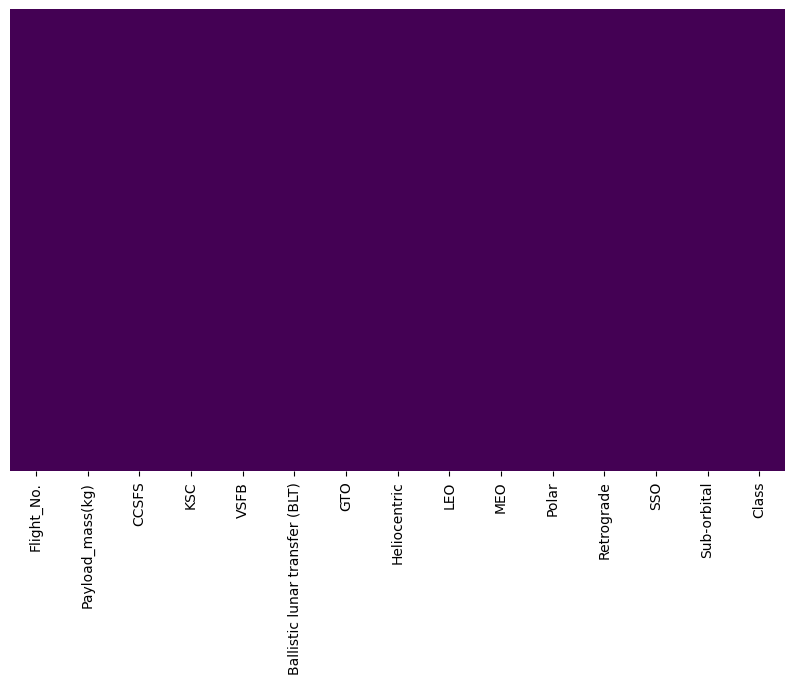

In [90]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(data_.isna(), cbar=False, cmap='viridis', yticklabels=False)

#### Lets create an automatic Feature Selection tool that classifies all the features via six different tests.

In [91]:
import scipy.stats as ss
from collections import Counter
import math
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [92]:
y = data_['Class']
X = data_.copy()
del X['Class']

feature_name = list(X.columns)
# no of maximum features we need to select
num_feats=14

def cor_selector(X, y,num_feats):
    # Your code goes here (Multiple lines)
    cor_list = []
    feature_name = X.columns.tolist()

    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)

    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    cor_support = [True if i in cor_feature else False for i in feature_name]
    # Your code ends here
    return cor_support, cor_feature

def chi_squared_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:, chi_support].columns.tolist()
    # Your code ends here
    return chi_support, chi_feature

def rfe_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    X_norm = MinMaxScaler().fit_transform(X)
    rfe_selector = RFE(estimator=LogisticRegression(),
                       n_features_to_select=num_feats,
                       step=10,
                       verbose=5
    )
    rfe_selector.fit(X_norm, y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    # Your code ends here
    return rfe_support, rfe_feature

def embedded_log_reg_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    X_norm = MinMaxScaler().fit_transform(X)
    embedded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1", solver="liblinear"), max_features=num_feats)
    embedded_lr_selector.fit(X_norm, y)

    embedded_lr_support = embedded_lr_selector.get_support()
    embedded_lr_feature = X.loc[:, embedded_lr_support].columns.tolist() 
    # Your code ends here
    return embedded_lr_support, embedded_lr_feature

def embedded_rf_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    embedded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
    embedded_rf_selector.fit(X, y)

    embedded_rf_support = embedded_rf_selector.get_support()
    embedded_rf_feature = X.loc[:, embedded_rf_support].columns.tolist() 
    # Your code ends here
    return embedded_rf_support, embedded_rf_feature

def embedded_lgbm_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    lgbc=LGBMClassifier(n_estimators=1, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
                        reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
    
    embedded_lgbm_selector = SelectFromModel(lgbc, max_features=num_feats)
    embedded_lgbm_selector.fit(X, y)

    embedded_lgbm_support = embedded_lgbm_selector.get_support()
    embedded_lgbm_feature = X.loc[:, embedded_lgbm_support].columns.tolist()
    # Your code ends here
    return embedded_lgbm_support, embedded_lgbm_feature

# Apply the selection functions and store the results
cor_support, _ = cor_selector(X, y, num_feats)
chi_support, _ = chi_squared_selector(X, y, num_feats)
rfe_support, _ = rfe_selector(X, y, num_feats)
embedded_lr_support, _ = embedded_log_reg_selector(X, y, num_feats)
embedded_rf_support, _ = embedded_rf_selector(X, y, num_feats)
embedded_lgbm_support, _ = embedded_lgbm_selector(X, y, num_feats)

feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embedded_lr_support,
                                    'Random Forest':embedded_rf_support, 'LightGBM':embedded_lgbm_support})
# count the selected times for each feature
#feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
feature_selection_df['Total'] = feature_selection_df.iloc[:, 1:].sum(axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 253, number of negative: 33
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 286, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.884615 -> initscore=2.036882
[LightGBM] [Info] Start training from score 2.036882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements


,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,Flight_No.,True,True,True,True,True,True,6
2,SSO,True,True,True,True,False,True,5
3,Payload_mass(kg),True,True,True,False,True,True,5
4,LEO,True,True,True,True,False,True,5
5,KSC,True,True,True,True,False,True,5
6,GTO,True,True,True,True,False,True,5
7,CCSFS,True,True,True,True,False,True,5
8,VSFB,True,True,True,False,False,True,4
9,Sub-orbital,True,True,True,False,False,True,4
10,Retrograde,True,True,True,False,False,True,4


In [93]:
data_.to_csv("D:/Download/spacex_2024_preprocessed.csv", index=False)